In [1]:
import os
print(os.getcwd())
train_base_dir = r"C:\Users\user\Downloads\vision applai\Session 3\ass2\train\train"
validation_base_dir = r"C:\Users\user\Downloads\vision applai\Session 3\ass2\valid\valid"
num_classes = 100  
train_images = []
train_labels = []
validation_images = []
validation_labels = []
classd=0
for class_name in os.listdir(train_base_dir):
    # if classd>=19:
    #     break
    train_dir = os.path.join(train_base_dir, class_name)
    validation_dir = os.path.join(validation_base_dir, class_name)

    if not os.path.isdir(train_dir) or not os.path.isdir(validation_dir):
        continue

    for filename in os.listdir(train_dir):
        if not filename.endswith('.jpg'):
            continue
        img_path1 = os.path.join(train_dir, filename)
        train_images.append(img_path1)
        train_labels.append(class_name)
#         print(img_path1,class_name)
    
    for filename in os.listdir(validation_dir):
        if not filename.endswith('.jpg'):
            continue
        img_path2 = os.path.join(validation_dir, filename)
        validation_images.append(img_path2)
        validation_labels.append(class_name)
print("read done....")

c:\Users\user\Downloads\vision applai\object detection last year\Deployment

read done....





Found 12594 images belonging to 100 classes.

Found 500 images belonging to 100 classes.

Found 500 images belonging to 1 classes.










Epoch 1/5







394/394 [==============================] - 4719s 12s/step - loss: 3.1131 - accuracy: 0.3183 - val_loss: 1.6517 - val_accuracy: 0.6260

Epoch 2/5

394/394 [==============================] - 5023s 13s/step - loss: 1.5059 - accuracy: 0.6313 - val_loss: 1.0210 - val_accuracy: 0.7360

Epoch 3/5

394/394 [==============================] - 4419s 11s/step - loss: 1.1295 - accuracy: 0.7106 - val_loss: 0.8679 - val_accuracy: 0.7980

Epoch 4/5

394/394 [==============================] - 5712s 15s/step - loss: 0.9510 - accuracy: 0.7494 - val_loss: 0.7590 - val_accuracy: 0.7880

Epoch 5/5

394/394 [==============================] - 14287s 36s/step - loss: 0.8333 - accuracy: 0.7754 - val_loss: 0.6265 - val_accuracy: 0.8340


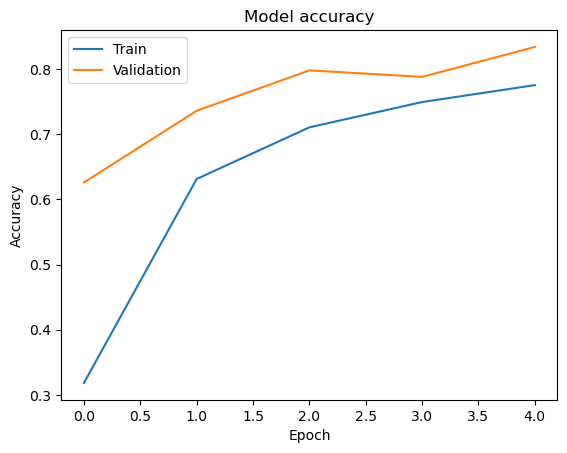

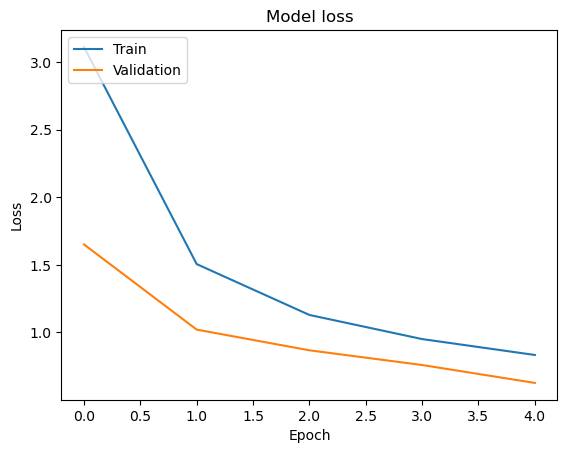

 1/16 [>.............................] - ETA: 3:42 - loss: 0.4407 - accuracy: 0.8125

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd

train_dir = r'C:\Users\user\Downloads\vision applai\Session 3\ass2\train\train'
valid_dir = r'C:\Users\user\Downloads\vision applai\Session 3\ass2\valid\valid'
test_dir = r'C:\Users\user\Downloads\vision applai\Session 3\ass2\test'

# preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode=None,
    shuffle=False
)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.weights.h5', save_best_only=True, save_weights_only=True)

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=valid_generator,
    callbacks=[early_stopping, model_checkpoint],
    batch_size=4
)

import joblib
joblib.dump(train_generator.classes, 'train_labels.pkl')
joblib.dump(valid_generator.classes, 'valid_labels.pkl')

In [6]:

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd

train_dir = r'C:\Users\user\Downloads\vision applai\Session 3\ass2\train\train'
valid_dir = r'C:\Users\user\Downloads\vision applai\Session 3\ass2\valid\valid'
test_dir = r'C:\Users\user\Downloads\vision applai\Session 3\ass2\test'

# preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode=None,
    shuffle=False
)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.load_weights('best_model.weights.h5')

import joblib
joblib.dump(train_generator.classes, 'train_labels.pkl')
joblib.dump(valid_generator.classes, 'valid_labels.pkl')

Found 12594 images belonging to 100 classes.

Found 500 images belonging to 100 classes.

Found 500 images belonging to 1 classes.


['valid_labels.pkl']

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

val_loss, val_accuracy = model.evaluate(valid_generator)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')
print(f'Validation Loss: {val_loss:.4f}')
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

test_generator.reset()
Y_pred = model.predict(test_generator, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes


cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix')
print(cm)
target_names = list(train_generator.class_indices.keys())
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=target_names))

test_filenames = test_generator.filenames
predicted_labels = [target_names[i] for i in y_pred]

submission_df = pd.DataFrame({
    'ID': [filename.split('/')[-1] for filename in test_filenames],
    'y': predicted_labels
})

submission_df.to_csv('submission_sc.csv', index=False)










16/16 [==============================] - 236s 9s/step - loss: 0.6265 - accuracy: 0.8340

Validation Accuracy: 83.40%

Validation Loss: 0.6265

500/500 [==============================] - 80s 137ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00

Test Accuracy: 0.00%

Test Loss: 0.0000

500/500 [==============================] - 239s 455ms/step

Confusion Matrix

[[8 5 2 ... 6 4 5]

 [0 0 0 ... 0 0 0]

 [0 0 0 ... 0 0 0]

 ...

 [0 0 0 ... 0 0 0]

 [0 0 0 ... 0 0 0]

 [0 0 0 ... 0 0 0]]

Classification Report

                           precision    recall  f1-score   support



                   ADONIS       1.00      0.02      0.03       500

AFRICAN GIANT SWALLOWTAIL       0.00      0.00      0.00         0

           AMERICAN SNOOT       0.00      0.00      0.00         0

                    AN 88       0.00      0.00      0.00         0

                  APPOLLO       0.00      0.00      0.00         0

     ARCIGERA FLOWER MOTH       0.00      0.00      0.00         0



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
import os
from keras.utils import load_img, img_to_array
from keras.applications.mobilenet import preprocess_input
from keras.applications import VGG16
import numpy as np

test_base_dir = r"C:\Users\user\Downloads\vision applai\Session 3\ass2\test\test"
test_images=[]
test_labels=[]
for filename in os.listdir(test_base_dir):
        if not filename.endswith('.jpg'):
            continue
        img_path = os.path.join(test_base_dir, filename)
        test_images.append(img_path)
        test_labels.append(filename)
        print(img_path,"  ########  ", filename )
model_MobileNet = VGG16(weights='imagenet', include_top=False)
def extract_features(images):
    iter=0
    features = []
    for img_path in images:
        img = load_img(img_path, target_size=(224, 224))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        print(f"{iter} model_MobileNet.predict....")
        features.append(model_MobileNet.predict(x).flatten())
        iter+=1
    return np.array(features)
test_features = extract_features(test_images)

import joblib
joblib.dump(test_features, 'test_features_VGG.pkl')
loaded_test_features = joblib.load('test_features_VGG.pkl')
print("test_features_VGG is save")        



C:\Users\user\Downloads\vision applai\Session 3\ass2\test\test\0.jpg   ########   0.jpg

C:\Users\user\Downloads\vision applai\Session 3\ass2\test\test\1.jpg   ########   1.jpg

C:\Users\user\Downloads\vision applai\Session 3\ass2\test\test\10.jpg   ########   10.jpg

C:\Users\user\Downloads\vision applai\Session 3\ass2\test\test\100.jpg   ########   100.jpg

C:\Users\user\Downloads\vision applai\Session 3\ass2\test\test\101.jpg   ########   101.jpg

C:\Users\user\Downloads\vision applai\Session 3\ass2\test\test\102.jpg   ########   102.jpg

C:\Users\user\Downloads\vision applai\Session 3\ass2\test\test\103.jpg   ########   103.jpg

C:\Users\user\Downloads\vision applai\Session 3\ass2\test\test\104.jpg   ########   104.jpg

C:\Users\user\Downloads\vision applai\Session 3\ass2\test\test\105.jpg   ########   105.jpg

C:\Users\user\Downloads\vision applai\Session 3\ass2\test\test\106.jpg   ########   106.jpg

C:\Users\user\Downloads\vision applai\Session 3\ass2\test\test\107.jpg   #######

In [ ]:
import pandas as pd
submission_lr = pd.DataFrame({
    'ID': [filename.split('/')[-1] for filename in test_images],
    'y': loaded_logistic_regression_predictions
})
submission_lr.to_csv('submissionMn1.csv', index=False)
print("submission_lr is save ")

# svm = SVC(kernel='linear', C=0.1, probability=True)
# svm_predictions_test = svm.predict(test_features)
# submission_svm = pd.DataFrame({
#     'ID': [filename.split('/')[-1] for filename in test_images],
#     'y': svm_predictions_test
# })
# submission_svm.to_csv('submissionMn2.csv', index=False)
# print("submission_svm is save " )

In [ ]:


train_features = joblib.load('train_features.pkl')
valid_features = joblib.load('valid_features.pkl')
test_features = joblib.load('test_features.pkl')
train_labels = joblib.load('train_labels.pkl')
valid_labels = joblib.load('valid_labels.pkl')